In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import pickle
import networkx as nx

# Pre-compiled MIRA examples
from mira.examples.chime import sviivr

%aimport pyciemss.utils

/Users/zuck016/.pyenv/versions/3.10.9/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import torch
import torchdiffeq
import matplotlib.pyplot as plt

petri_G = pyciemss.utils.load_mira(sviivr)
petri_G = pyciemss.utils.add_state_indicies(petri_G)
sir_ode_func = pyciemss.utils.petri_to_ode(petri_G)
state0 = pyciemss.utils.order_state(petri_G, S=torch.tensor(1000.), I=torch.tensor(1.), R=torch.tensor(0.))
print(state0, pyciemss.utils.unorder_state(petri_G, *state0))
tspan = torch.linspace(0, 160., 160)
print(sir_ode_func(tspan[0], state0))
jit_sir_ode_func = torch.jit.trace(sir_ode_func, (tspan[0], state0))
soln = torchdiffeq.odeint(jit_sir_ode_func, state0, tspan)
plt.scatter(tspan, soln[0], label="S")
plt.scatter(tspan, soln[1], label="I")
plt.scatter(tspan, soln[2], label="R")
plt.legend()

AttributeError: module 'pyciemss.utils' has no attribute 'load_mira'

{'state': ['S', 'I', 'R'], 'transition': ['t1', 't2']}


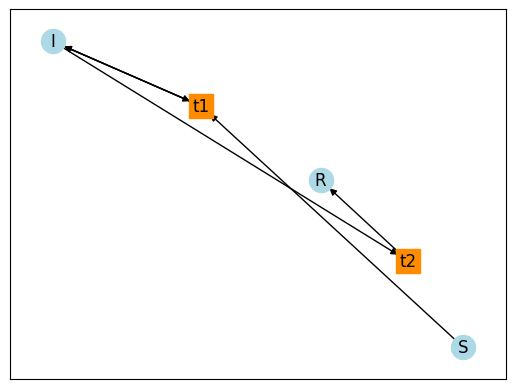

In [9]:
pyciemss.utils.draw_petri(petri_G)

In [17]:
mandate_fragment.nodes(data=True)

NodeDataView({'m': {'type': 'transition', 'template_type': 'Logistic'}, 'beta': {'type': 'state'}, 'I': {'type': 'state'}})

{'state': ['beta', 'I'], 'transition': ['m']}


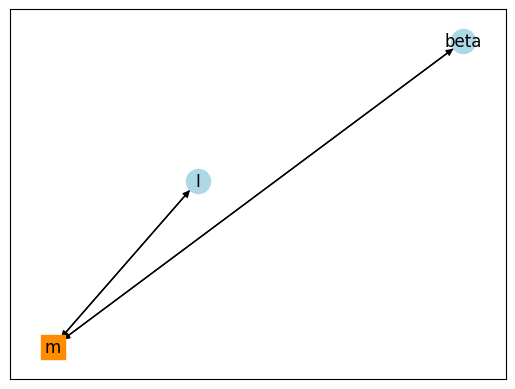

In [12]:
mandate_fragment = nx.MultiDiGraph()

mandate_fragment.add_node("m", type="transition", template_type="Logistic")
mandate_fragment.add_node("beta", type="state")
mandate_fragment.add_node("I", type="state")

mandate_fragment.add_edge("beta", "m")
mandate_fragment.add_edge("m", "beta")
mandate_fragment.add_edge("I", "m")
mandate_fragment.add_edge("m", "I")

pyciemss.utils.draw_petri(mandate_fragment)

In [14]:
pwd

'/Users/zuck016/Projects/Proposals/ASKEM/pyciemss/notebook'

{'state': ['S', 'I', 'R', 'beta'], 'transition': ['t1', 't2', 'm']}


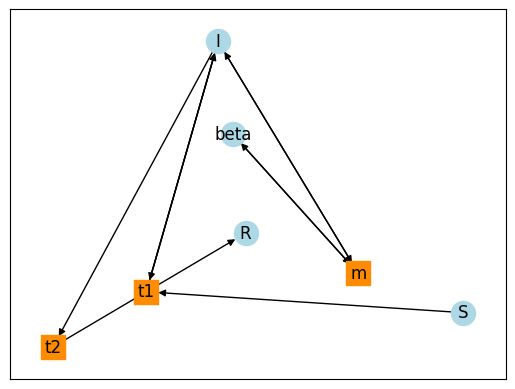

In [13]:
intervened_SIR_G = pyciemss.utils.intervene_petri_net(petri_G, m=mandate_fragment)
pyciemss.utils.draw_petri(intervened_SIR_G)